In [ ]:
import nltk
import numpy as np
import nltk
from numpy.random import randint, seed
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import re
import os
import matplotlib.pyplot as plt
from PIL import Image                         
%matplotlib inlinefrom nltk.corpus import comtrans
from googletrans import Translator
import nltk
from nltk import sent_tokenize, word_tokenize
import spacy
from nltk.book import *
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [5]:
# You should download the NLTK data once.
# It can be a bit time consuming.
# nltk.download()

### 1. About the NLTK library:

In [54]:
#
#  From the US president B. Obama's Nov-4th-2008 speech.
#

paragraph = """If there is anyone out there who still doubts that America is a place where all things are possible; who still wonders if the dream of our founders is alive in our time; who still questions the power of our democracy: Tonight is your answer.
It's the answer told by lines that stretched around schools and churches in numbers this nation has never seen; by people who waited three hours and four hours, many for the very first time in their lives, because they believed that this time must be different; that their voices could be that difference. 
It's the answer spoken by young and old, rich and poor, Democrat and Republican, black, white, Hispanic, Asian, Native American, gay, straight, disabled and not disabled -- Americans who sent a message to the world that we have never been just a collection of individuals or a collection of Red States and Blue States: we are, and always will be, the United States of America!
It's the answer that -- that led those who have been told for so long by so many to be cynical, and fearful, and doubtful about what we can achieve to put their hands on the arc of history and bend it once more toward the hope of a better day.
It's been a long time coming, but tonight, because of what we did on this day, in this election, at this defining moment, change has come to America.
A little bit earlier this evening, I received an extraordinarily gracious call from Senator McCain. Senator McCain fought long and hard in this campaign, and he's fought even longer and harder for the country that he loves. He has endured sacrifices for America that most of us cannot begin to imagine. We are better off for the service rendered by this brave and selfless leader. I congratulate him; I congratulate Governor Palin for all that they've achieved, and I look forward to working with them to renew this nation's promise in the months ahead.
I want to thank my partner in this journey, a man who campaigned from his heart and spoke for the men and women he grew up with on the streets of Scranton and rode with on the train home to Delaware, the Vice President-elect of the United States, Joe Biden. """

#### 1.1. Tokenization: 

In [3]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ElhajAbdouM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# extract the words from the sentence

In [56]:
text = "God is Great! I won a lottery."
print(word_tokenize(text))

['God', 'is', 'Great', '!', 'I', 'won', 'a', 'lottery', '.']


# # extract the sentences from the article

In [57]:
sentences = nltk.sent_tokenize(paragraph)
print(sentences)

['If there is anyone out there who still doubts that America is a place where all things are possible; who still wonders if the dream of our founders is alive in our time; who still questions the power of our democracy: Tonight is your answer.', "It's the answer told by lines that stretched around schools and churches in numbers this nation has never seen; by people who waited three hours and four hours, many for the very first time in their lives, because they believed that this time must be different; that their voices could be that difference.", "It's the answer spoken by young and old, rich and poor, Democrat and Republican, black, white, Hispanic, Asian, Native American, gay, straight, disabled and not disabled -- Americans who sent a message to the world that we have never been just a collection of individuals or a collection of Red States and Blue States: we are, and always will be, the United States of America!", "It's the answer that -- that led those who have been told for so

In [59]:
print(word_tokenize(sentences[0]))

['If', 'there', 'is', 'anyone', 'out', 'there', 'who', 'still', 'doubts', 'that', 'America', 'is', 'a', 'place', 'where', 'all', 'things', 'are', 'possible', ';', 'who', 'still', 'wonders', 'if', 'the', 'dream', 'of', 'our', 'founders', 'is', 'alive', 'in', 'our', 'time', ';', 'who', 'still', 'questions', 'the', 'power', 'of', 'our', 'democracy', ':', 'Tonight', 'is', 'your', 'answer', '.']


In [61]:
print(word_tokenize(sentences[1]))

['It', "'s", 'the', 'answer', 'told', 'by', 'lines', 'that', 'stretched', 'around', 'schools', 'and', 'churches', 'in', 'numbers', 'this', 'nation', 'has', 'never', 'seen', ';', 'by', 'people', 'who', 'waited', 'three', 'hours', 'and', 'four', 'hours', ',', 'many', 'for', 'the', 'very', 'first', 'time', 'in', 'their', 'lives', ',', 'because', 'they', 'believed', 'that', 'this', 'time', 'must', 'be', 'different', ';', 'that', 'their', 'voices', 'could', 'be', 'that', 'difference', '.']


In [63]:
# Tokenize into words.
words = nltk.word_tokenize(paragraph)
print(words)

['If', 'there', 'is', 'anyone', 'out', 'there', 'who', 'still', 'doubts', 'that', 'America', 'is', 'a', 'place', 'where', 'all', 'things', 'are', 'possible', ';', 'who', 'still', 'wonders', 'if', 'the', 'dream', 'of', 'our', 'founders', 'is', 'alive', 'in', 'our', 'time', ';', 'who', 'still', 'questions', 'the', 'power', 'of', 'our', 'democracy', ':', 'Tonight', 'is', 'your', 'answer', '.', 'It', "'s", 'the', 'answer', 'told', 'by', 'lines', 'that', 'stretched', 'around', 'schools', 'and', 'churches', 'in', 'numbers', 'this', 'nation', 'has', 'never', 'seen', ';', 'by', 'people', 'who', 'waited', 'three', 'hours', 'and', 'four', 'hours', ',', 'many', 'for', 'the', 'very', 'first', 'time', 'in', 'their', 'lives', ',', 'because', 'they', 'believed', 'that', 'this', 'time', 'must', 'be', 'different', ';', 'that', 'their', 'voices', 'could', 'be', 'that', 'difference', '.', 'It', "'s", 'the', 'answer', 'spoken', 'by', 'young', 'and', 'old', ',', 'rich', 'and', 'poor', ',', 'Democrat', 'and

#### 1.2. Stemming: returning the root for each word

In [64]:
# Pick one of the following stemmers.
# stemmer = SnowballStemmer('english')
# stemmer = LancasterStemmer()
stemmer = PorterStemmer()

In [65]:
sentences

['If there is anyone out there who still doubts that America is a place where all things are possible; who still wonders if the dream of our founders is alive in our time; who still questions the power of our democracy: Tonight is your answer.',
 "It's the answer told by lines that stretched around schools and churches in numbers this nation has never seen; by people who waited three hours and four hours, many for the very first time in their lives, because they believed that this time must be different; that their voices could be that difference.",
 "It's the answer spoken by young and old, rich and poor, Democrat and Republican, black, white, Hispanic, Asian, Native American, gay, straight, disabled and not disabled -- Americans who sent a message to the world that we have never been just a collection of individuals or a collection of Red States and Blue States: we are, and always will be, the United States of America!",
 "It's the answer that -- that led those who have been told for

In [66]:
# Stemming.
for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])  # Tokenize into words.
    words = [stemmer.stem(x) for x in words]  # Stemming.
    sentences[i] = " ".join(words)  # Rejoin the words as a sentence.

In [67]:
print(sentences)

['if there is anyon out there who still doubt that america is a place where all thing are possibl ; who still wonder if the dream of our founder is aliv in our time ; who still question the power of our democraci : tonight is your answer .', "it 's the answer told by line that stretch around school and church in number thi nation ha never seen ; by peopl who wait three hour and four hour , mani for the veri first time in their live , becaus they believ that thi time must be differ ; that their voic could be that differ .", "it 's the answer spoken by young and old , rich and poor , democrat and republican , black , white , hispan , asian , nativ american , gay , straight , disabl and not disabl -- american who sent a messag to the world that we have never been just a collect of individu or a collect of red state and blue state : we are , and alway will be , the unit state of america !", "it 's the answer that -- that led those who have been told for so long by so mani to be cynic , and

In [68]:
stemmer.stem("worked")

'work'

In [69]:
stemmer.stem("cried")

'cri'

In [70]:
stemmer.stem("remembrance")

'remembr'

In [71]:
stemmer.stem("happily")

'happili'

### Lemmatization: 

- `lemma` is the form of a word under which it is registered in a dictionary

-   in NLTK is the algorithmic process of finding the word depending on its meaning and context.

- its the same as steaming but it returns the word into ints root depending on the context of the text.

- its base on morphological analysis of words (التحليل الصرفي للكلمه في الجمله).

- Why is Lemmatization better than Stemming?

Stemming algorithm works by **cutting the suffix** from the word. In a broader sense **cuts** either the **beginning** or **end** of the **word**. 

Lemmatization is a more powerful operation, and it takes into **consideration morphological analysis** of the **words**. 

NLTK POS Tags Examples are as below:

Abbreviation 	Meaning

`CC` 	**coordinating conjunction**

`CD` 	**cardinal digit**

`DT` 	**determiner**

`EX` 	**existential there**

`FW` 	**foreign word**

`IN` 	**preposition/subordinating conjunction**

`JJ` 	**This NLTK POS Tag is an adjective (large)**

`JJR` 	**adjective, comparative (larger)**

`JJS` 	**adjective, superlative (largest)**

`LS` 	**list market**

`MD` 	**modal (could, will)**

`NN` 	**noun, singular (cat, tree)**

`NNS` 	**noun plural (desks)**

`NNP` 	**proper noun, singular (sarah)**

`NNPS` 	**proper noun, plural (indians or americans)**

`PDT` 	**predeterminer (all, both, half)**

`POS` 	**possessive ending (parent\ ‘s)**

`PRP` 	**personal pronoun (hers, herself, him, himself)**

`PRP$` 	**possessive pronoun (her, his, mine, my, our )**

`RB` 	**adverb (occasionally, swiftly)**

`RBR` 	**adverb, comparative (greater)**

`RBS` 	**adverb, superlative (biggest)**

`RP`	**particle (about)**

`TO` 	**infinite marker (to)**

`UH` 	**interjection (goodbye)**

`VB` 	**verb (ask)**

`VBG` 	**verb gerund (judging)**

`VBD` 	**verb past tense (pleaded)**

`VBN` 	**verb past participle (reunified)**

`VBP` 	**verb, present tense not 3rd person singular(wrap)**

`VBZ`	**verb, present tense with 3rd person singular (bases)**

`WDT` 	**wh-determiner (that, what)**

`WP` 	**wh- pronoun (who)**

`WRB` 	**wh- adverb (how)**


In [2]:
nltk.download("wordnet")

NameError: name 'nltk' is not defined

In [6]:
lemmatizer = WordNetLemmatizer()

print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))
print(lemmatizer.lemmatize("cried"))

# a denotes adjective in "pos"
print("better :", lemmatizer.lemmatize("better", pos="a"))

rocks : rock
corpora : corpus
cried
better : good


In [286]:
porter_stemmer = PorterStemmer()
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(text)
print(tokenization)
for w in tokenization:
    print("Stemming for {} is {}".format(w, porter_stemmer.stem(w)))

['studies', 'studying', 'cries', 'cry']
Stemming for studies is studi
Stemming for studying is studi
Stemming for cries is cri
Stemming for cry is cri


In [67]:
wordnet_lemmatizer = WordNetLemmatizer()
text = "studies studying cries cry"
tokenization = nltk.word_tokenize(text)
for w in tokenization:
    print("Lemma for {} is {}".format(w, wordnet_lemmatizer.lemmatize(w)))

Lemma for studies is study
Lemma for studying is studying
Lemma for cries is cry
Lemma for cry is cry


In [83]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mohamed Elhaj-
[nltk_data]     Abdou\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [89]:
# Python program to demonstrate
# dictionary


Dict = {1: "Geeks", 2: "For", 3: "Geeks"}
print("Dictionary:")
print(Dict)
print(Dict[1])

# Uncommenting this print(Dict[4])
# will raise a KeyError as the
# 4 is not present in the dictionary

Dictionary:
{1: 'Geeks', 2: 'For', 3: 'Geeks'}
Geeks


In [287]:
print(Dict[2])

For


In [288]:
print(Dict[3])

Geeks


In [289]:
print(Dict[4])

KeyError: 4

### defaultdict  provides a defualt dictionary value for the key that doesnot exists (therefore donot rise erorr when the value is not exists)

In [297]:
# defaultdict is a contrainer just liek dictionaries in module collection
# it provides a defualt dictionary value for the key that doesnot exists
# (therefore donot rise erorr when the value is not exists)


def def_value():
    return "Not found"


# Defining the dict
d = defaultdict(def_value)

d["a"] = 1
d["b"] = 2
print(d)
print(d["a"])
print(d["b"])
print(d["c"])

defaultdict(<function def_value at 0x0000023CAB1D89D8>, {'a': 1, 'b': 2})
1
2
Not found


In [302]:
# Defining the dict and passing
# lambda as default_factory argument

d = defaultdict(lambda: "Not here")
d["a"] = 100
d["b"] = 2154852
d["s"] = "Mohamed"
print(d)

print(d["a"])
print(d["b"])
print(d["s"])

defaultdict(<function <lambda> at 0x0000023CAB1D8840>, {'a': 100, 'b': 2154852, 's': 'Mohamed'})
100
2154852
Mohamed


In [303]:
print(d["c"])

Not here


In [7]:
# Importing wordnet package for lemnization processes


# dictionay is created where pos_tag (first litter) are the key values whoes values are mapped with the value from the wordnet dictionary

## means anything else didnot assigned will be NOUN
tag_map = defaultdict(lambda: wn.NOUN)
tag_map
# for i in tag_map:
#     print(i)

defaultdict(<function __main__.<lambda>>, {})

- `noun`     a word (other than a pronoun) used to identify any of a class of people, places, or things ( common noun ), or to name a particular one of these ( proper noun ).


- `wn.VERB` A verb is a word that conveys ACTION, OCCURRENCE, or STATE OF BEING. Verbs are needed to form complete sentences or questions. In a sentence, a verb works as the main component of the predicate, the part of a sentence that indicates what the subject (person or thing) is or does.

- `wn.ADJ` Adjectives  are words that are used to describe or modify nouns or pronouns. For example, red, quick, happy, and obnoxious are adjectives because they can describe things—a red hat, the quick rabbit, a happy duck, an obnoxious person

-  `wn.ADV` a Adverb word or phrase that modifies or qualifies an adjective, verb, or other adverb or a word group, expressing a relation of place, time, circumstance, manner, cause, degree, etc. (e.g., gently, quite, then, there )

In [8]:
tag_map["J"] = wn.ADJ
tag_map["V"] = wn.VERB
tag_map["R"] = wn.ADV

In [9]:
# tag_map['Adjectives'] = wn.ADJ
# tag_map['VERB'] = wn.VERB
# tag_map['adverb'] = wn.ADV
# tag_map

In [21]:
text = "guru99 is a totally new kinds of learning experiencing such as playing qualities writing and eating."
text = "He said, “Teddy Roosevelt was a great President"
tokens = word_tokenize(text)
tokens

['He',
 'said',
 ',',
 '“',
 'Teddy',
 'Roosevelt',
 'was',
 'a',
 'great',
 'President']

In [22]:
lemma_function = WordNetLemmatizer()
lemma_function

<WordNetLemmatizer>

In [23]:
# tag_map[tag[0]]

In [24]:
tag_map

defaultdict(<function __main__.<lambda>>,
            {',': 'n',
             'D': 'n',
             'I': 'n',
             'J': 'a',
             'N': 'n',
             'P': 'n',
             'R': 'r',
             'V': 'v'})

In [25]:
for token, tag in pos_tag(tokens):
    print()
    lemma = lemma_function.lemmatize(token, tag_map[tag[0]])
    print(
        "token", "=>", token, "=>", "tag", "=>", tag, "=>", "Converted to", "=>", lemma
    )


token => He => tag => PRP => Converted to => He

token => said => tag => VBD => Converted to => say

token => , => tag => , => Converted to => ,

token => “ => tag => NNP => Converted to => “

token => Teddy => tag => NNP => Converted to => Teddy

token => Roosevelt => tag => NNP => Converted to => Roosevelt

token => was => tag => VBD => Converted to => be

token => a => tag => DT => Converted to => a

token => great => tag => JJ => Converted to => great

token => President => tag => NNP => Converted to => President


In [26]:
for token, tag in pos_tag(tokens):
    print()
    lemma = lemma_function.lemmatize(token, tag_map[tag[0]])
    print(
        "token", "=>", token, "=>", "tag", "=>", tag, "=>", "Converted to", "=>", lemma
    )


token => He => tag => PRP => Converted to => He

token => said => tag => VBD => Converted to => say

token => , => tag => , => Converted to => ,

token => “ => tag => NNP => Converted to => “

token => Teddy => tag => NNP => Converted to => Teddy

token => Roosevelt => tag => NNP => Converted to => Roosevelt

token => was => tag => VBD => Converted to => be

token => a => tag => DT => Converted to => a

token => great => tag => JJ => Converted to => great

token => President => tag => NNP => Converted to => President


In [268]:
tag_map

defaultdict(<function __main__.<lambda>>,
            {'.': 'n',
             'C': 'n',
             'D': 'n',
             'I': 'n',
             'J': 'a',
             'N': 'n',
             'R': 'r',
             'V': 'v'})

Some more examples with the POS tags specified.

In [108]:
lemmatizer.lemmatize("dogs", wordnet.NOUN)

'dog'

In [109]:
lemmatizer.lemmatize("wolves", wordnet.NOUN)

'wolf'

In [110]:
lemmatizer.lemmatize("has", wordnet.VERB)

'have'

In [111]:
lemmatizer.lemmatize("helpful", wordnet.ADJ)

'helpful'

In [112]:
lemmatizer.lemmatize("happily", wordnet.ADV)

'happily'

In [114]:
# You should download the NLTK data once.
# It can be a bit time consuming.
# nltk.download()

### 1. More about the NLTK library:

In [115]:
#
#  From the US president B. Obama's Nov-4th-2008 speech.
#

paragraph = """If there is anyone out there who still doubts that America is a place where all things are possible; who still wonders if the dream of our founders is alive in our time; who still questions the power of our democracy: Tonight is your answer.
It's the answer told by lines that stretched around schools and churches in numbers this nation has never seen; by people who waited three hours and four hours, many for the very first time in their lives, because they believed that this time must be different; that their voices could be that difference. 
It's the answer spoken by young and old, rich and poor, Democrat and Republican, black, white, Hispanic, Asian, Native American, gay, straight, disabled and not disabled -- Americans who sent a message to the world that we have never been just a collection of individuals or a collection of Red States and Blue States: we are, and always will be, the United States of America!
It's the answer that -- that led those who have been told for so long by so many to be cynical, and fearful, and doubtful about what we can achieve to put their hands on the arc of history and bend it once more toward the hope of a better day.
It's been a long time coming, but tonight, because of what we did on this day, in this election, at this defining moment, change has come to America.
A little bit earlier this evening, I received an extraordinarily gracious call from Senator McCain. Senator McCain fought long and hard in this campaign, and he's fought even longer and harder for the country that he loves. He has endured sacrifices for America that most of us cannot begin to imagine. We are better off for the service rendered by this brave and selfless leader. I congratulate him; I congratulate Governor Palin for all that they've achieved, and I look forward to working with them to renew this nation's promise in the months ahead.
I want to thank my partner in this journey, a man who campaigned from his heart and spoke for the men and women he grew up with on the streets of Scranton and rode with on the train home to Delaware, the Vice President-elect of the United States, Joe Biden. """

In [116]:
paragraph

"If there is anyone out there who still doubts that America is a place where all things are possible; who still wonders if the dream of our founders is alive in our time; who still questions the power of our democracy: Tonight is your answer.\nIt's the answer told by lines that stretched around schools and churches in numbers this nation has never seen; by people who waited three hours and four hours, many for the very first time in their lives, because they believed that this time must be different; that their voices could be that difference. \nIt's the answer spoken by young and old, rich and poor, Democrat and Republican, black, white, Hispanic, Asian, Native American, gay, straight, disabled and not disabled -- Americans who sent a message to the world that we have never been just a collection of individuals or a collection of Red States and Blue States: we are, and always will be, the United States of America!\nIt's the answer that -- that led those who have been told for so long 

#### 1.1. Tokenization and pre-processing:

In [129]:
# Tokenize into sentences.
sentences = nltk.sent_tokenize(paragraph)
sentences

['If there is anyone out there who still doubts that America is a place where all things are possible; who still wonders if the dream of our founders is alive in our time; who still questions the power of our democracy: Tonight is your answer.',
 "It's the answer told by lines that stretched around schools and churches in numbers this nation has never seen; by people who waited three hours and four hours, many for the very first time in their lives, because they believed that this time must be different; that their voices could be that difference.",
 "It's the answer spoken by young and old, rich and poor, Democrat and Republican, black, white, Hispanic, Asian, Native American, gay, straight, disabled and not disabled -- Americans who sent a message to the world that we have never been just a collection of individuals or a collection of Red States and Blue States: we are, and always will be, the United States of America!",
 "It's the answer that -- that led those who have been told for

## Convert to lower case

In [130]:
for i in range(len(sentences)):
    sentences[i] = sentences[i].lower()
sentences

['if there is anyone out there who still doubts that america is a place where all things are possible; who still wonders if the dream of our founders is alive in our time; who still questions the power of our democracy: tonight is your answer.',
 "it's the answer told by lines that stretched around schools and churches in numbers this nation has never seen; by people who waited three hours and four hours, many for the very first time in their lives, because they believed that this time must be different; that their voices could be that difference.",
 "it's the answer spoken by young and old, rich and poor, democrat and republican, black, white, hispanic, asian, native american, gay, straight, disabled and not disabled -- americans who sent a message to the world that we have never been just a collection of individuals or a collection of red states and blue states: we are, and always will be, the united states of america!",
 "it's the answer that -- that led those who have been told for

### filtering out the `word character (a-z,A-Z, 0-9, _)` 

In [131]:
for i in range(len(sentences)):
    # Substitute the non-alphanumeric characters with space.
    sentences[i] = re.sub(r"\W", " ", sentences[i])
sentences

['if there is anyone out there who still doubts that america is a place where all things are possible  who still wonders if the dream of our founders is alive in our time  who still questions the power of our democracy  tonight is your answer ',
 'it s the answer told by lines that stretched around schools and churches in numbers this nation has never seen  by people who waited three hours and four hours  many for the very first time in their lives  because they believed that this time must be different  that their voices could be that difference ',
 'it s the answer spoken by young and old  rich and poor  democrat and republican  black  white  hispanic  asian  native american  gay  straight  disabled and not disabled    americans who sent a message to the world that we have never been just a collection of individuals or a collection of red states and blue states  we are  and always will be  the united states of america ',
 'it s the answer that    that led those who have been told for

### # Remove the excess of white spaces. 

In [133]:
for i in range(len(sentences)):
    sentences[i] = re.sub(r"\s+", " ", sentences[i])
sentences

['if there is anyone out there who still doubts that america is a place where all things are possible who still wonders if the dream of our founders is alive in our time who still questions the power of our democracy tonight is your answer ',
 'it s the answer told by lines that stretched around schools and churches in numbers this nation has never seen by people who waited three hours and four hours many for the very first time in their lives because they believed that this time must be different that their voices could be that difference ',
 'it s the answer spoken by young and old rich and poor democrat and republican black white hispanic asian native american gay straight disabled and not disabled americans who sent a message to the world that we have never been just a collection of individuals or a collection of red states and blue states we are and always will be the united states of america ',
 'it s the answer that that led those who have been told for so long by so many to be 

### # Remove the space at the `end of a sentence` using `$`.

In [134]:
for i in range(len(sentences)):
    sentences[i] = re.sub(r"\s$", "", sentences[i])
sentences

['if there is anyone out there who still doubts that america is a place where all things are possible who still wonders if the dream of our founders is alive in our time who still questions the power of our democracy tonight is your answer',
 'it s the answer told by lines that stretched around schools and churches in numbers this nation has never seen by people who waited three hours and four hours many for the very first time in their lives because they believed that this time must be different that their voices could be that difference',
 'it s the answer spoken by young and old rich and poor democrat and republican black white hispanic asian native american gay straight disabled and not disabled americans who sent a message to the world that we have never been just a collection of individuals or a collection of red states and blue states we are and always will be the united states of america',
 'it s the answer that that led those who have been told for so long by so many to be cyn

#### 1.2. Removal of the stop words: 

In [308]:
stopwords.words("arabic")

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [309]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
#
#  From the US president B. Obama's Nov-4th-2008 speech.
#

paragraph = """If there is anyone out there who still doubts that America is a place where all things are possible; who still wonders if the dream of our founders is alive in our time; who still questions the power of our democracy: Tonight is your answer.
It's the answer told by lines that stretched around schools and churches in numbers this nation has never seen; by people who waited three hours and four hours, many for the very first time in their lives, because they believed that this time must be different; that their voices could be that difference. 
It's the answer spoken by young and old, rich and poor, Democrat and Republican, black, white, Hispanic, Asian, Native American, gay, straight, disabled and not disabled -- Americans who sent a message to the world that we have never been just a collection of individuals or a collection of Red States and Blue States: we are, and always will be, the United States of America!
It's the answer that -- that led those who have been told for so long by so many to be cynical, and fearful, and doubtful about what we can achieve to put their hands on the arc of history and bend it once more toward the hope of a better day.
It's been a long time coming, but tonight, because of what we did on this day, in this election, at this defining moment, change has come to America.
A little bit earlier this evening, I received an extraordinarily gracious call from Senator McCain. Senator McCain fought long and hard in this campaign, and he's fought even longer and harder for the country that he loves. He has endured sacrifices for America that most of us cannot begin to imagine. We are better off for the service rendered by this brave and selfless leader. I congratulate him; I congratulate Governor Palin for all that they've achieved, and I look forward to working with them to renew this nation's promise in the months ahead.
I want to thank my partner in this journey, a man who campaigned from his heart and spoke for the men and women he grew up with on the streets of Scranton and rode with on the train home to Delaware, the Vice President-elect of the United States, Joe Biden. """

In [136]:
for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])  # Tokenize into words.
    words = [
        x for x in words if x not in stopwords.words("english")
    ]  # Remove the stop words.
    sentences[i] = " ".join(words)  # Rejoin as a sentence.

In [137]:
print(sentences)

['anyone still doubts america place things possible still wonders dream founders alive time still questions power democracy tonight answer', 'answer told lines stretched around schools churches numbers nation never seen people waited three hours four hours many first time lives believed time must different voices could difference', 'answer spoken young old rich poor democrat republican black white hispanic asian native american gay straight disabled disabled americans sent message world never collection individuals collection red states blue states always united states america', 'answer led told long many cynical fearful doubtful achieve put hands arc history bend toward hope better day', 'long time coming tonight day election defining moment change come america', 'little bit earlier evening received extraordinarily gracious call senator mccain', 'senator mccain fought long hard campaign fought even longer harder country loves', 'endured sacrifices america us begin imagine', 'better se

In [9]:
print(paragraph)

If there is anyone out there who still doubts that America is a place where all things are possible; who still wonders if the dream of our founders is alive in our time; who still questions the power of our democracy: Tonight is your answer.
It's the answer told by lines that stretched around schools and churches in numbers this nation has never seen; by people who waited three hours and four hours, many for the very first time in their lives, because they believed that this time must be different; that their voices could be that difference. 
It's the answer spoken by young and old, rich and poor, Democrat and Republican, black, white, Hispanic, Asian, Native American, gay, straight, disabled and not disabled -- Americans who sent a message to the world that we have never been just a collection of individuals or a collection of Red States and Blue States: we are, and always will be, the United States of America!
It's the answer that -- that led those who have been told for so long by s

#### 1.3. POS tagging:

NLTK POS Tags Examples are as below:

Abbreviation 	Meaning

`CC` 	**coordinating conjunction**

`CD` 	**cardinal digit**

`DT` 	**determiner**

`EX 	**existential there**

`FW` 	**foreign word**

`IN` 	**preposition/subordinating conjunction**

`JJ` 	**This NLTK POS Tag is an adjective (large)**

`JJR` 	**adjective, comparative (larger)**

`JJS` 	**adjective, superlative (largest)**

`LS` 	**list market**

`MD` 	**modal (could, will)**

`NN` 	**noun, singular (cat, tree)**

`NNS` 	**noun plural (desks)**

`NNP` 	**proper noun, singular (sarah)**

`NNPS` 	**proper noun, plural (indians or americans)**

`PDT` 	**predeterminer (all, both, half)**

`POS` 	**possessive ending (parent\ ‘s)**

`PRP` 	**personal pronoun (hers, herself, him, himself)**

`PRP$` 	**possessive pronoun (her, his, mine, my, our )**

`RB` 	**adverb (occasionally, swiftly)**

`RBR` 	**adverb, comparative (greater)**

`RBS` 	**adverb, superlative (biggest)**

`RP`	**particle (about)**

`TO` 	**infinite marker (to)**

`UH` 	**interjection (goodbye)**

`VB` 	**verb (ask)**

`VBG` 	**verb gerund (judging)**

`VBD` 	**verb past tense (pleaded)**

`VBN` 	**verb past participle (reunified)**

`VBP` 	**verb, present tense not 3rd person singular(wrap)**

`VBZ`	**verb, present tense with 3rd person singular (bases)**

`WDT` 	**wh-determiner (that, what)**

`WP` 	**wh- pronoun (who)**

`WRB` 	**wh- adverb (how)**


In [323]:
# Test sentence.
my_sentence = (
    "The Colosseum each was 99 some five deleted built by the emperor Vespassian"
)

In [324]:
# Simple pre-processing.
my_words = nltk.word_tokenize(my_sentence)
print(my_words)

['The', 'Colosseum', 'each', 'was', '99', 'some', 'five', 'deleted', 'built', 'by', 'the', 'emperor', 'Vespassian']


In [325]:
for i in range(len(my_words)):
    my_words[i] = my_words[i].lower()
my_words

['the',
 'colosseum',
 'each',
 'was',
 '99',
 'some',
 'five',
 'deleted',
 'built',
 'by',
 'the',
 'emperor',
 'vespassian']

In [326]:
# POS tagging.
# OUTPUT: A list of tuples.
my_words_tagged = nltk.pos_tag(my_words)
my_words_tagged

[('the', 'DT'),
 ('colosseum', 'NN'),
 ('each', 'DT'),
 ('was', 'VBD'),
 ('99', 'CD'),
 ('some', 'DT'),
 ('five', 'CD'),
 ('deleted', 'VBN'),
 ('built', 'VBN'),
 ('by', 'IN'),
 ('the', 'DT'),
 ('emperor', 'NN'),
 ('vespassian', 'NN')]

In [327]:
# Join the words + POS as a sentence.
my_words_tagged2 = []
for tw in my_words_tagged:
    my_words_tagged2.append(tw[0] + "(" + tw[1] + ")")
my_sentence_tagged = " ".join(my_words_tagged2)
my_sentence_tagged

'the(DT) colosseum(NN) each(DT) was(VBD) 99(CD) some(DT) five(CD) deleted(VBN) built(VBN) by(IN) the(DT) emperor(NN) vespassian(NN)'

In [270]:
corpus = [
    "this is the first document",
    "this document is the second document",
    "and this is the third one",
    "is this the first document",
]
vocabulary = ["this", "document", "first", "is", "second", "the", "and", "one"]

In [271]:
vocabulary

['this', 'document', 'first', 'is', 'second', 'the', 'and', 'one']

In [272]:
pipe = Pipeline(
    [("count", CountVectorizer(vocabulary=vocabulary)), ("tfid", TfidfTransformer())]
).fit(corpus)
pipe

Pipeline(steps=[('count',
                 CountVectorizer(vocabulary=['this', 'document', 'first', 'is',
                                             'second', 'the', 'and', 'one'])),
                ('tfid', TfidfTransformer())])

In [273]:
pipe["count"].transform(corpus).toarray()
pipe

Pipeline(steps=[('count',
                 CountVectorizer(vocabulary=['this', 'document', 'first', 'is',
                                             'second', 'the', 'and', 'one'])),
                ('tfid', TfidfTransformer())])

In [275]:
pipe = Pipeline(
    [("count", CountVectorizer(vocabulary=vocabulary)), ("tfid", TfidfTransformer())]
).fit(corpus)

In [276]:
pipe["count"].transform(corpus).toarray()

array([[1, 1, 1, 1, 0, 1, 0, 0],
       [1, 2, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 0, 0]], dtype=int64)

### 1. TF IDF representation:

#### 1.1. Create a TF IDF matrix: 

In [277]:
# The data.
my_docs = [
    "The economic slowdown is becoming more severe",
    "The movie was simply awesome",
    "I like cooking my own food",
    "Samsung is announcing a new technology",
    "Machine Learning is an example of awesome technology",
    "All of us were excited at the movie",
    "We have to do more to reverse the economic slowdown",
]

In [278]:
# A very simple pre-processing.
my_docs = [x.lower() for x in my_docs]

TfidfVectorizer() arguments: <br>
- *max_features* : maximum number of features (distict words). <br>
- *min_df* : The minimum DF. Integer value means count and real number (0~1) means proportion. <br> 
- *max_df* : The maximum DF. Integer value means count and real number (0~1) means proportion. Helps to filter out the stop words. <br> 

In [279]:
vectorizer = TfidfVectorizer(
    max_features=10, min_df=1, max_df=3, stop_words=stopwords.words("english")
)
X = vectorizer.fit_transform(
    my_docs
).toarray()  # Conversion to a dense matrix with toarray().

In [280]:
# Size of the X matrix (m x n).
X.shape

(7, 10)

In [281]:
# Output the features.
print(vectorizer.get_feature_names())

['announcing', 'awesome', 'economic', 'movie', 'reverse', 'samsung', 'severe', 'simply', 'slowdown', 'technology']


In [282]:
# Output a vector corresponding to a document.
print(X[0])

[0.         0.         0.53828134 0.         0.         0.
 0.64846464 0.         0.53828134 0.        ]


In [7]:
!pip install nltk

In [31]:
nltk.download("gutenberg")
nltk.download("genesis")
nltk.download("inaugural")
nltk.download("nps_chat")
nltk.download("webtext")
nltk.download("treebank")

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\original\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\original\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\original\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\original\AppData\Roaming\nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\original\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\original\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [32]:
def custom_concordance(text, word, window_size=30, max_lines=5):
    sentences = text.split(
        "."
    )  # Split the text into sentences (assuming sentences end with periods).
    result = []

    for sentence in sentences:
        if word in sentence:
            words = sentence.split()
            index = words.index(word)
            start_index = max(0, index - window_size)
            end_index = min(len(words), index + window_size + 1)
            context = " ".join(words[start_index:end_index])
            result.append(context)

            if len(result) >= max_lines:
                break

    return result

In [33]:
text = "Mohamed like eating banana. Mohamed is playing fooboall"

text = "Mohamed likes eating bananas. Mohamed is playing football."
word_to_find = "Mohamed"

concordance_results = custom_concordance(text, word_to_find, window_size=5, max_lines=5)

for context in concordance_results:
    print(context)

Mohamed likes eating bananas
Mohamed is playing football


In [30]:
# Find concordances for a word
text = text6  # Using Monty Python and the Holy Grail as an example
text.concordance("knight", lines=5)

Displaying 5 of 84 matches:
: Man ! ARTHUR : Man . Sorry . What knight live in that castle over there ? DE
rthur music ] [ music stops ] BLACK KNIGHT : Aaagh ! [ King Arthur music ] [ m
rthur music ] [ music stops ] BLACK KNIGHT : Aaagh ! GREEN KNIGHT : Ooh ! [ Ki
tops ] BLACK KNIGHT : Aaagh ! GREEN KNIGHT : Ooh ! [ King Arthur music ] [ mus
ic ] [ music stops ] [ stab ] BLACK KNIGHT : Aagh ! GREEN KNIGHT : Oh ! [ King


In [35]:
article = """Title: "Emerging Technology Trends Shaping the Future"

In today's fast-paced digital landscape, technology is constantly evolving, driving innovation across various industries. From artificial intelligence to the Internet of Things, emerging technology trends are reshaping the way we live, work, and interact with the world. In this article, we'll explore some of the most exciting technology trends that are set to define the future.

1. Artificial Intelligence (AI) and Machine Learning

AI and machine learning have been at the forefront of technological advancements. These technologies enable computers to learn from data, make decisions, and perform tasks that traditionally required human intelligence. AI is revolutionizing industries such as healthcare, finance, and transportation, with applications ranging from diagnosing diseases to autonomous vehicles.

2. Internet of Things (IoT)

The IoT refers to the network of interconnected devices and objects that can communicate and share data with each other. From smart homes with connected thermostats and appliances to industrial sensors optimizing manufacturing processes, IoT is transforming how we interact with our environments.

3. 5G Connectivity

The rollout of 5G networks promises lightning-fast internet speeds and low latency. This technology will pave the way for more reliable connections, making it possible for autonomous vehicles to communicate with each other and for remote surgeries to be performed in real-time.

4. Blockchain Technology

Blockchain is more than just the technology behind cryptocurrencies like Bitcoin. It's a secure, decentralized ledger that has the potential to disrupt industries such as finance, supply chain management, and healthcare. It ensures transparency, security, and immutability of data.

5. Augmented and Virtual Reality (AR/VR)

AR and VR technologies are enhancing our experiences in various fields, from gaming and entertainment to education and healthcare. With AR, we can overlay digital information onto the real world, while VR immerses us in entirely virtual environments.

6. Quantum Computing

Quantum computing harnesses the power of quantum mechanics to solve complex problems at speeds unimaginable with classical computers. It has the potential to revolutionize fields like cryptography, materials science, and drug discovery.

7. Sustainability Tech

As environmental concerns grow, technology is playing a crucial role in sustainability efforts. Innovations in renewable energy, waste reduction, and eco-friendly materials are helping us address pressing environmental challenges.

8. Cybersecurity Advancements

With the increasing complexity of cyber threats, cybersecurity is a top priority. Advanced technologies like artificial intelligence and machine learning are being used to detect and prevent cyberattacks in real-time.

Conclusion

These emerging technology trends represent the driving force behind the Fourth Industrial Revolution. They are reshaping our world, opening up new possibilities, and solving complex challenges. Embracing and understanding these trends will be essential for individuals and businesses looking to thrive in the digital age.

"""

In [36]:
# Find collocations in a text
text = text6  # Using Monty Python and the Holy Grail as an example
collocations = text.collocations()

BLACK KNIGHT; clop clop; HEAD KNIGHT; mumble mumble; Holy Grail;
squeak squeak; FRENCH GUARD; saw saw; Sir Robin; Run away; CARTOON
CHARACTER; King Arthur; Iesu domine; Pie Iesu; DEAD PERSON; Round
Table; clap clap; OLD MAN; dramatic chord; dona eis


## finding the pairs words

In [39]:
# Tokenize the article into words
article_words = nltk.word_tokenize(article)

# Create an NLTK text object
article_text = nltk.Text(article_words)

# Find collocations in the text
collocations = article_text.collocations()

# Print the collocations
print(collocations)

autonomous vehicles; machine learning; technology trends; artificial
intelligence; emerging technology
None


In [38]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\original\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

#### Chunking

How to Use:


Chunking is used to group words into "chunks" based on their parts of speech (POS) tags.


Importance:

Chunking can help identify meaningful phrases or entities in text.
Code:

In [44]:
import nltk

nltk.download("punkt")
from nltk import word_tokenize, pos_tag, ne_chunk

# Sample text
text = "Steve Jobs was the co-founder of Apple Inc. He was born in San Francisco."

# Tokenize and perform POS tagging
words = word_tokenize(text)
tags = pos_tag(words)

# Perform chunking (named entity recognition)
chunks = ne_chunk(tags)
print(chunks)

(S
  (PERSON Steve/NNP)
  (PERSON Jobs/NNP)
  was/VBD
  the/DT
  co-founder/NN
  of/IN
  (PERSON Apple/NNP Inc/NNP)
  ./.
  He/PRP
  was/VBD
  born/VBN
  in/IN
  (GPE San/NNP Francisco/NNP)
  ./.)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\original\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:
nltk.download("maxent_ne_chunker")
nltk.download("words")

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\original\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\original\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


True

## Dependency Parsing


How to Use:

Dependency parsing is used to analyze grammatical relationships between words in a sentence.

Importance:

Understanding sentence structure and syntax.

In [50]:
# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Sample sentence
sentence = "The quick brown fox jumps over the lazy dog."
sentence = "Mohamed like eating apples and banana. he is working hard and looking good "

# Parse the sentence
doc = nlp(sentence)

# Print dependency tree
for token in doc:
    print(f"{token.text} --{token.dep_}--> {token.head.text}")

Mohamed --ROOT--> Mohamed
like --prep--> Mohamed
eating --pcomp--> like
apples --dobj--> eating
and --cc--> apples
banana --conj--> apples
. --punct--> Mohamed
he --nsubj--> working
is --aux--> working
working --ROOT--> working
hard --advmod--> working
and --cc--> working
looking --conj--> working
good --acomp--> looking


## Discourse analysis 

is a complex and specialized field within linguistics and natural language processing. 

It focuses on understanding the structure, organization, and flow of text or spoken language in larger contexts such as conversations, narratives, or documents. 

Discourse analysis often involves identifying discourse markers, rhetorical patterns, coherence, and cohesion within a text.

Here's a very simplified example of identifying some basic discourse markers in a text using Python and NLTK:

In [46]:
# Sample text with discourse markers
text = "Firstly, I'd like to say that it's important to understand the context. Secondly, let's discuss the main points. In conclusion, we need to summarize the key takeaways."

# Tokenize the text into sentences
sentences = sent_tokenize(text)

# Identify and print discourse markers (e.g., "Firstly," "Secondly," "In conclusion,")
for sentence in sentences:
    words = word_tokenize(sentence)
    discourse_markers = [
        word
        for word in words
        if word.endswith(",")
        or word.lower() in ["firstly", "secondly", "in", "conclusion"]
    ]
    if discourse_markers:
        print("Discourse markers:", discourse_markers)
    else:
        print("No discourse markers found in:", sentence)

Discourse markers: ['Firstly', ',']
Discourse markers: ['Secondly', ',']
Discourse markers: ['In', 'conclusion', ',']


Explanation:

We start by importing the NLTK library and tokenizing the input text into sentences using sent_tokenize.

Within each sentence, we tokenize the words using word_tokenize.

We then identify and print words that serve as discourse markers. 

In this simplified example, we're looking for words that either end with a comma or are specific discourse markers like "Firstly," "Secondly," "In," and "Conclusion."

In [66]:
# Create a Translator object
translator = Translator()

# Text to translate
text_to_translate = "Hello, how are you?"

# Detect the language of the input text (optional)
detected_language = translator.detect(text_to_translate).lang
print(f"Detected Language: {detected_language}")

# Translate the text to a different language (e.g., Spanish)
translated_text = translator.translate(text_to_translate, src="en", dest="es")

# Print the translated text
print(f"Original Text: {text_to_translate}")
print(f"Translated Text (to Spanish): {translated_text.text}")

AttributeError: 'NoneType' object has no attribute 'group'

In [55]:
nltk.download("comtrans")

[nltk_data] Downloading package comtrans to
[nltk_data]     C:\Users\original\AppData\Roaming\nltk_data...


True

In [57]:
words

['Resumption', 'of', 'the', 'session', 'I', 'declare', ...]

In [56]:
words = comtrans.words("alignment-en-fr.txt")
for word in words[:6]:
    print(word)

Resumption
of
the
session
I
declare


In [60]:
!pip install graphviz


In [61]:
als = comtrans.aligned_sents("alignment-en-fr.txt")[0]
als

Exception: Cannot find the dot binary from Graphviz package

AlignedSent(['Resumption', 'of', 'the', 'session'], ['Reprise', 'de', 'la', 'session'], Alignment([(0, 0), (1, 1), (2, 2), (3, 3)]))

In [52]:
!pip install googletrans

  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=4578d09ca54cc335595f72dc2aea86ec16d8772a8f7f2f967b6b4838b57cd5e2
  Stored in directory: c:\users\original\appdata\local\pip\cache\wheels\27\f3\32\d4859d40071f07a5df0ab6fdc0076e78a8a786625dde2b4b2f
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Successfully uninstalled h11-0.14.0
  Attempting uninstall: idna
    Found existing installation: idna 3.2
    Uninstalling idna-3.2:
      Successfully uninstalled idna-3.2
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling chardet-4.0.0:
      Successfully uninstalled chardet-4.0.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.


## Coding Exercise #0608

In [3]:
# Install WordCloud once.
!pip install wordcloud

In [63]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\original\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\original\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\original\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 1. Visualize the text data as a WordCloud:

In [64]:
# Go to the directory where the data file is located.
# os.chdir(r'~~')                # Please, replace the path with your own.

In [65]:
f = open("book_three_little_pigs.txt", "r", encoding="UTF8")
my_book = f.readlines()
f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'book_three_little_pigs.txt'

#### 1.1. Pre-processing:

In [154]:
n_min = 4  # Minimum number of characters.
corpus = []
lemmatizer = WordNetLemmatizer()
for a_line in my_book:
    pre = re.sub(
        r"\W", " ", a_line
    )  # Substitute the non-alphanumerics character by space.
    pre = re.sub(r"\d+", "", pre)  # Remove numbers.
    pre = nltk.word_tokenize(pre)  # Tokenize into words.
    pre = [x for x in pre if len(x) > n_min]  # Minimum length.
    pre = [x.lower() for x in pre]  # Convert into the lowercase.
    pre = [x for x in pre if x not in stopwords.words("english")]  # Remove stopwords.
    pre = [lemmatizer.lemmatize(x) for x in pre]  # Lemmatize.
    corpus += pre  # Back to the corpus.

In [155]:
len(corpus)

1597

#### 1.2. Generate a basic wordcloud:

In [156]:
# WordCloud requires that the imput data be a single long string.
a_long_sentence = " ".join(corpus)

In [1]:
wc = WordCloud(background_color="black", max_words=20)
wc.generate(" ".join(df.clean_text.values))
plt.imshow(wc)
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [24]:
wc = WordCloud(background_color="white", max_words=30)  # Customize the output.
wc.generate(a_long_sentence)
# wc.words_                                                          # Check for the top ranking words.

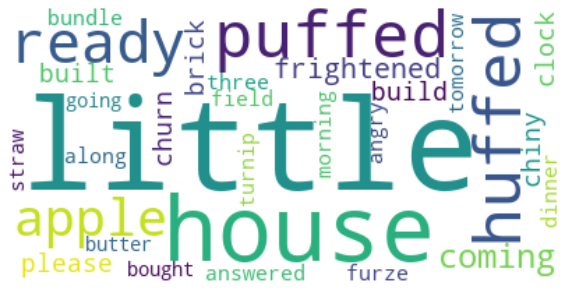

In [25]:
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  # Turn off the axes.
plt.show()

#### 1.3. Generate wordcloud using a mask:

In [28]:
# Pick a background mask.
# img = Image.open('background_1.png')                    # Elipse.
# img = Image.open('background_2.png')                   # Speech bubble.
# img = Image.open('background_3.png')                    # Heart.
img = Image.open("background_4.png")  # Circle.
back_mask = np.array(img)

In [29]:
wc = WordCloud(
    background_color="white", max_words=30, mask=back_mask
)  # Customize the output.
wc.generate(a_long_sentence)

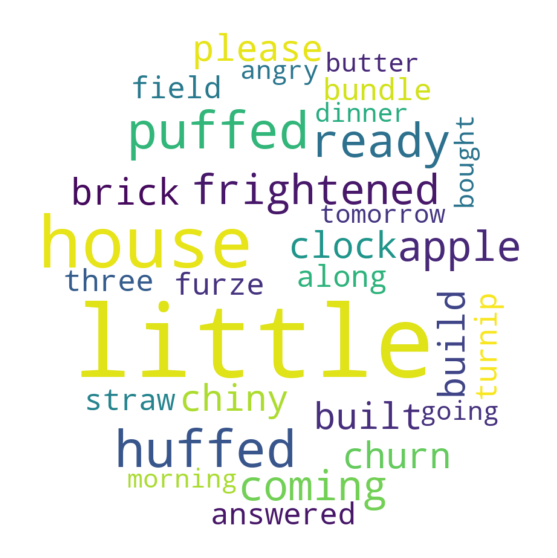

In [30]:
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  # Turn off the axes.
plt.savefig("out.png")  # Save to an external file.
plt.show()

## Coding Exercise #0609

### 1. n-Gram based autofill:

In [159]:
# Text data for training.
my_text = """Machine learning is the scientific study of algorithms and statistical models that computer systems use to effectively perform a specific task without using explicit instructions, relying on patterns and inference instead. It is seen as a subset of artificial intelligence. Machine learning algorithms build a mathematical model of sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to perform the task.[1][2]:2 Machine learning algorithms are used in the applications of email filtering, detection of network intruders, and computer vision, where it is infeasible to develop an algorithm of specific instructions for performing the task. Machine learning is closely related to computational statistics, which focuses on making predictions using computers. The study of mathematical optimization delivers methods, theory and application domains to the field of machine learning. Data mining is a field of study within machine learning, and focuses on exploratory data analysis through unsupervised learning In its application across business problems, machine learning is also referred to as predictive analytics."""

In [160]:
my_text = [
    my_text.lower()
]  # Convert to lowercase and make a list. => Required by the CountVectorizer().

#### 1.1. n-Gram trial run:

In [161]:
n = 3  # Can be changed to a number equal or larger than 2.
n_min = n
n_max = n
n_gram_type = "word"  # n-Gram with words.
vectorizer = CountVectorizer(ngram_range=(n_min, n_max), analyzer=n_gram_type)

In [162]:
n_grams = vectorizer.fit(my_text).get_feature_names()  # Get the n-Grams as a list.
n_gram_cts = vectorizer.transform(
    my_text
).toarray()  #  The output is an array of array.
n_gram_cts = list(n_gram_cts[0])  # Convert into a simple list.

In [163]:
list(zip(n_grams, n_gram_cts))  # Make a list of tuples and show.

[('across business problems', 1),
 ('algorithm of specific', 1),
 ('algorithms and statistical', 1),
 ('algorithms are used', 1),
 ('algorithms build mathematical', 1),
 ('also referred to', 1),
 ('an algorithm of', 1),
 ('analysis through unsupervised', 1),
 ('and application domains', 1),
 ('and computer vision', 1),
 ('and focuses on', 1),
 ('and inference instead', 1),
 ('and statistical models', 1),
 ('application across business', 1),
 ('application domains to', 1),
 ('applications of email', 1),
 ('are used in', 1),
 ('artificial intelligence machine', 1),
 ('as predictive analytics', 1),
 ('as subset of', 1),
 ('as training data', 1),
 ('being explicitly programmed', 1),
 ('build mathematical model', 1),
 ('business problems machine', 1),
 ('closely related to', 1),
 ('computational statistics which', 1),
 ('computer systems use', 1),
 ('computer vision where', 1),
 ('computers the study', 1),
 ('data analysis through', 1),
 ('data in order', 1),
 ('data known as', 1),
 ('data 

#### 1.2. Train by making a dictionary based on n-Grams:

In [164]:
n = 3  # Can be changed to a number equal or larger than 2.
n_min = n
n_max = n
n_gram_type = "word"
vectorizer = CountVectorizer(ngram_range=(n_min, n_max), analyzer=n_gram_type)

In [165]:
n_grams = vectorizer.fit(my_text).get_feature_names()  # A list of n-Grams.
my_dict = {}
for a_gram in n_grams:
    words = nltk.word_tokenize(a_gram)
    a_nm1_gram = " ".join(words[0 : n - 1])  # (n-1)-Gram.
    next_word = words[-1]  # Word after the a_nm1_gram.
    if a_nm1_gram not in my_dict.keys():
        my_dict[a_nm1_gram] = [
            next_word
        ]  # a_nm1_gram is a new key. So, initialize the dictionary entry.
    else:
        my_dict[a_nm1_gram] += [next_word]  # an_nm1_gram is already in the dictionary.

In [166]:
# View the dictionary.
my_dict

{'across business': ['problems'],
 'algorithm of': ['specific'],
 'algorithms and': ['statistical'],
 'algorithms are': ['used'],
 'algorithms build': ['mathematical'],
 'also referred': ['to'],
 'an algorithm': ['of'],
 'analysis through': ['unsupervised'],
 'and application': ['domains'],
 'and computer': ['vision'],
 'and focuses': ['on'],
 'and inference': ['instead'],
 'and statistical': ['models'],
 'application across': ['business'],
 'application domains': ['to'],
 'applications of': ['email'],
 'are used': ['in'],
 'artificial intelligence': ['machine'],
 'as predictive': ['analytics'],
 'as subset': ['of'],
 'as training': ['data'],
 'being explicitly': ['programmed'],
 'build mathematical': ['model'],
 'business problems': ['machine'],
 'closely related': ['to'],
 'computational statistics': ['which'],
 'computer systems': ['use'],
 'computer vision': ['where'],
 'computers the': ['study'],
 'data analysis': ['through'],
 'data in': ['order'],
 'data known': ['as'],
 'data m

#### 1.3. Predict the next word:

In [167]:
# Helper function that picks the following word.
def predict_next(a_nm1_gram):
    value_list_size = len(
        my_dict[a_nm1_gram]
    )  # length of the value corresponding to the key = a_nm1_gram.
    i_pick = randint(
        0, value_list_size
    )  # A random number from the range 0 ~ value_list_size.
    return my_dict[a_nm1_gram][i_pick]  # Return the randomly chosen next word.

In [168]:
# Test.
input_str = "order to"  # Has to be a VALID (n-1)-Gram!
predict_next(input_str)

'make'

In [169]:
# Another test.
# Repeat for 10 times and see that the next word is chosen randomly with a probability proportional to the occurrence.
input_str = "machine learning"  # Has to be a VALID (n-1)-Gram!
for i in range(10):
    print(predict_next(input_str))

data
is
algorithms
is
and
data
and
algorithms
is
algorithms


#### 1.4. Predict a sequence:

In [170]:
# Initialize the random seed.
seed(123)

In [171]:
# A seed string has to be input by the user.
my_seed_str = "machine learning"  # Has to be a VALID (n-1)-Gram!
# my_seed_str = 'in order'                                         # Has to be a VALID (n-1)-Gram!

In [172]:
a_nm1_gram = my_seed_str
output_string = my_seed_str  # Initialize the output string.
while a_nm1_gram in my_dict:
    output_string += " " + predict_next(a_nm1_gram)
    words = nltk.word_tokenize(output_string)
    a_nm1_gram = " ".join(words[-n + 1 :])  # Update a_nm1_gram.

In [173]:
# Output the predicted sequence.
output_string

'machine learning data mining is field of study within machine learning data mining is field of machine learning algorithms are used in the applications of email filtering detection of network intruders and computer vision where it is infeasible to develop an algorithm of specific instructions for performing the task machine learning and focuses on making predictions using computers the study of algorithms and statistical models that computer systems use to effectively perform specific task without using explicit instructions relying on patterns and inference instead it is seen as subset of artificial intelligence machine learning and focuses on exploratory data analysis through unsupervised learning in its application across business problems machine learning and focuses on exploratory data analysis through unsupervised learning in its application across business problems machine learning and focuses on exploratory data analysis through unsupervised learning in its application across 

## Coding Excercise #0610

In [174]:
import nltk
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances

### 1. TF IDF representation:

#### 1.1. Create a TF IDF matrix: 

In [175]:
# The data.
my_docs = [
    "The economic slowdown is becoming more severe",
    "The movie was simply awesome",
    "I like cooking my own food",
    "Samsung is announcing a new technology",
    "Machine Learning is an example of awesome technology",
    "All of us were excited at the movie",
    "We have to do more to reverse the economic slowdown",
]

In [176]:
# A very simple pre-processing.
my_docs = [x.lower() for x in my_docs]

TfidfVectorizer() arguments: <br>
- *max_features* : maximum number of features (distict words). <br>
- *min_df* : The minimum DF. Integer value means count and real number (0~1) means proportion. <br> 
- *max_df* : The maximum DF. Integer value means count and real number (0~1) means proportion. Helps to filter out the stop words. <br> 

In [177]:
vectorizer = TfidfVectorizer(
    max_features=10, min_df=1, max_df=3, stop_words=stopwords.words("english")
)
X = vectorizer.fit_transform(
    my_docs
).toarray()  # Conversion to a dense matrix with toarray().

In [178]:
# Size of the X matrix (m x n).
X.shape

(7, 10)

In [179]:
# Output the features.
print(vectorizer.get_feature_names())

['announcing', 'awesome', 'economic', 'movie', 'reverse', 'samsung', 'severe', 'simply', 'slowdown', 'technology']


In [180]:
# Output a vector corresponding to a document.
print(X[0])

[0.         0.         0.53828134 0.         0.         0.
 0.64846464 0.         0.53828134 0.        ]


#### 1.2. Calculate the cosine similarity:

In [181]:
# The cosine similarity matrix.
1 - np.round(pairwise_distances(X, metric="cosine"), 3)

array([[1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.579],
       [0.   , 1.   , 0.   , 0.   , 0.381, 0.538, 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.358, 0.   , 0.   ],
       [0.   , 0.381, 0.   , 0.358, 1.   , 0.   , 0.   ],
       [0.   , 0.538, 0.   , 0.   , 0.   , 1.   , 0.   ],
       [0.579, 0.   , 0.   , 0.   , 0.   , 0.   , 1.   ]])

In [182]:
# Cosine similarity between two documents by linear algebra.
np.dot(X[0], X[6].T)

0.5794936078209331

In [183]:
# Cosine similarity between two documents by linear algebra.
np.dot(X[3], X[4].T)

0.35793913951147677